In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## Random Forest

In [2]:
# Assuming the CSV file has the same name as the original text file
csv_file_path = 'rfresult.csv'

# Read the CSV file into a DataFrame
rfdf = pd.read_csv(csv_file_path)

rfdf.head()

,max_depth,n_learner,f1_score,elapsed_time,total_score
0,140,40,0.947898,39.687213,0.749462
1,135,33,0.946990,12.281241,0.885583
2,9,79,0.510282,9.068053,0.464941
3,131,49,0.947948,16.652097,0.864687
4,54,75,0.947515,25.109570,0.821967


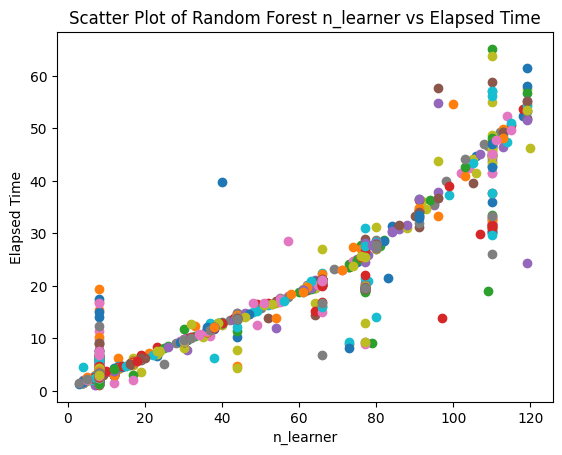

In [3]:
# Iterate through each row and create a scatter plot
for index, row in rfdf.iterrows():
    n_learner = row['n_learner']
    elapsed_time = row['elapsed_time']
    
    # Plot the point for each row
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}')

# Set labels and title
plt.xlabel('n_learner')
plt.ylabel('Elapsed Time')
plt.title('Scatter Plot of Random Forest n_learner vs Elapsed Time')

# Display legend
# plt.legend()

# Show the plot
plt.show()


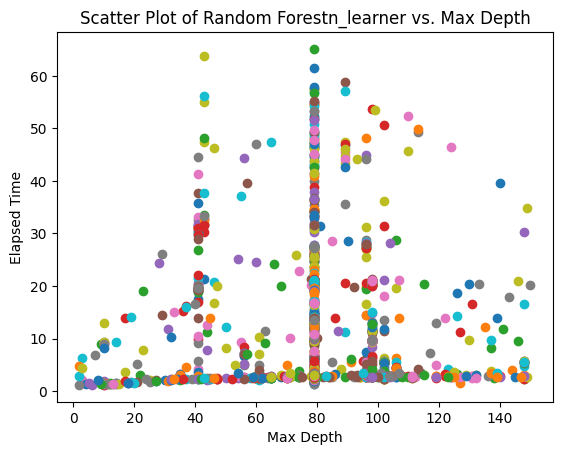

In [32]:
# Iterate through each row and create a scatter plot
for index, row in rfdf.iterrows():
    n_learner = row['max_depth']
    elapsed_time = row['elapsed_time']
    
    # Plot the point for each row
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}')

# Set labels and title
plt.xlabel('Max Depth')
plt.ylabel('Elapsed Time')
plt.title('Scatter Plot of Random Forestn_learner vs. Max Depth')

# Display legend
# plt.legend()

# Show the plot
plt.show()


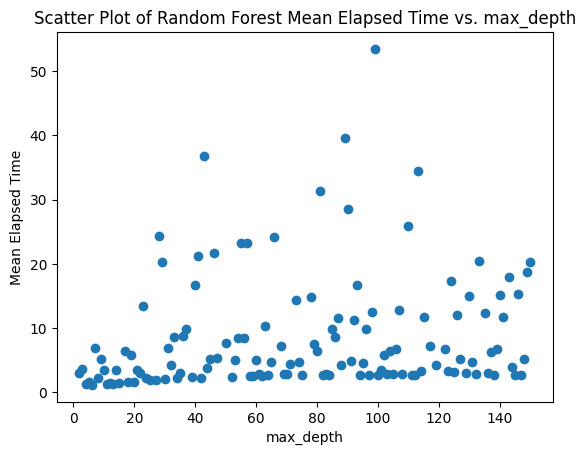

In [33]:
# Group by 'max_depth' and calculate the mean of 'elapsed_time'
mean_elapsed_time = rfdf.groupby('max_depth')['elapsed_time'].mean().reset_index()

# Scatter plot of mean_elapsed_time vs max_depth
plt.scatter(mean_elapsed_time['max_depth'], mean_elapsed_time['elapsed_time'])

# Set labels and title
plt.xlabel('max_depth')
plt.ylabel('Mean Elapsed Time')
plt.title('Scatter Plot of Random Forest Mean Elapsed Time vs. max_depth')

# Show the plot
plt.show()

## ADABoost

In [39]:
# Assuming the CSV file has the same name as the original text file
csv_file_path = 'adaresult.csv'

# Read the CSV file into a DataFrame
adadf = pd.read_csv(csv_file_path)

adadf.head()

,max_depth,n_learner,f1_score,elapsed_time,total_score
0,51,22,0.943734,75.980313,0.905743
1,57,36,0.945152,131.413074,0.879445
2,35,27,0.873440,68.554709,0.839163
3,94,38,0.934127,150.359779,0.858947
4,28,21,0.742342,49.002857,0.717841


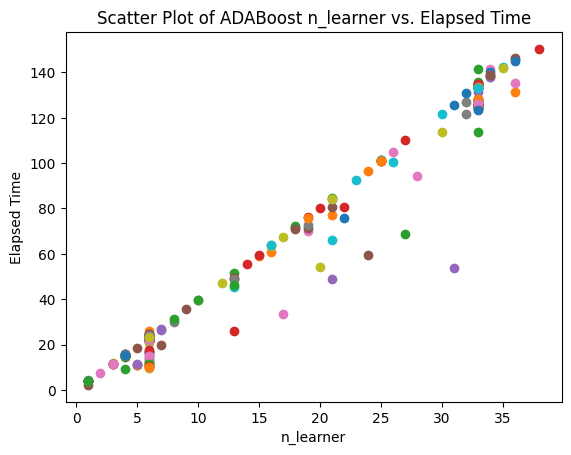

In [36]:
# Iterate through each row and create a scatter plot
for index, row in adadf.iterrows():
    n_learner = row['n_learner']
    elapsed_time = row['elapsed_time']
    
    # Plot the point for each row
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}')

# Set labels and title
plt.xlabel('n_learner')
plt.ylabel('Elapsed Time')
plt.title('Scatter Plot of ADABoost n_learner vs. Elapsed Time')

# Display legend
# plt.legend()

# Show the plot
plt.show()


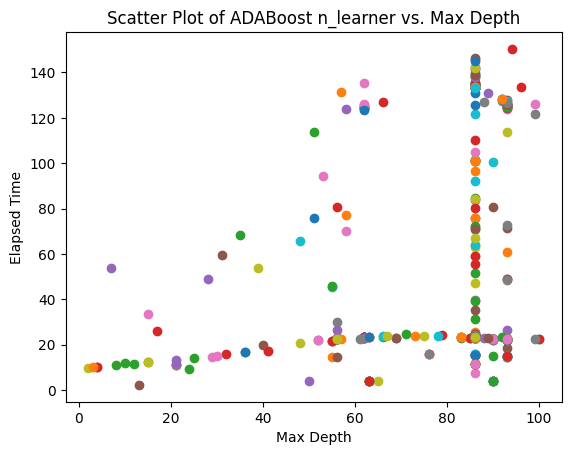

In [37]:
# Iterate through each row and create a scatter plot
for index, row in adadf.iterrows():
    n_learner = row['max_depth']
    elapsed_time = row['elapsed_time']
    
    # Plot the point for each row
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}')

# Set labels and title
plt.xlabel('Max Depth')
plt.ylabel('Elapsed Time')
plt.title('Scatter Plot of ADABoost n_learner vs. Max Depth')

# Display legend
# plt.legend()

# Show the plot
plt.show()


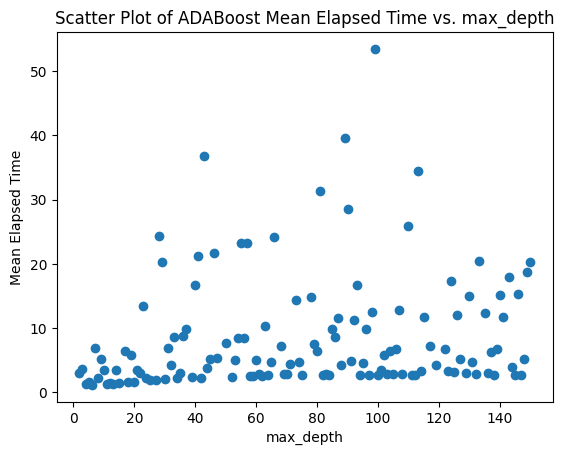

In [38]:
# Group by 'max_depth' and calculate the mean of 'elapsed_time'
mean_elapsed_time = df.groupby('max_depth')['elapsed_time'].mean().reset_index()

# Scatter plot of mean_elapsed_time vs max_depth
plt.scatter(mean_elapsed_time['max_depth'], mean_elapsed_time['elapsed_time'])

# Set labels and title
plt.xlabel('max_depth')
plt.ylabel('Mean Elapsed Time')
plt.title('Scatter Plot of ADABoost Mean Elapsed Time vs. max_depth')

# Show the plot
plt.show()

In [93]:

# Find the row with the maximum 'total_score'
max_total_score_row = adadf.loc[adadf['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] -0.001

# Find rows with total_score within the tolerance range
rows_within_tolerance = adadf[adadf['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 76.0, 4.0, 0.930548258195808
[76.0, 4.0, 0.938482983718803, 15.960078239440918, 0.9305029445990826], -0.00% Tolerance
[76.0, 4.0, 0.938482983718803, 16.00426149368286, 0.9304808529719616], -0.01% Tolerance
[76.0, 4.0, 0.938482983718803, 15.86945104598999, 0.930548258195808], 0.00% Tolerance
[76.0, 4.0, 0.938482983718803, 15.977316856384276, 0.9304943252906108], -0.01% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.552677392959595, 0.9296247155292768], -0.10% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.14918065071106, 0.929826463900401], -0.08% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.22941732406616, 0.9297863455637236], -0.08% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.36085271835327, 0.92972062786658], -0.09% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.19339251518249, 0.9298043579681652], -0.08% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.37017178535461, 0.9297159683330792], -0.09% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.35503625869751, 0.9297235360964078]

In [100]:
max_total_score_row['max_depth']

76.0

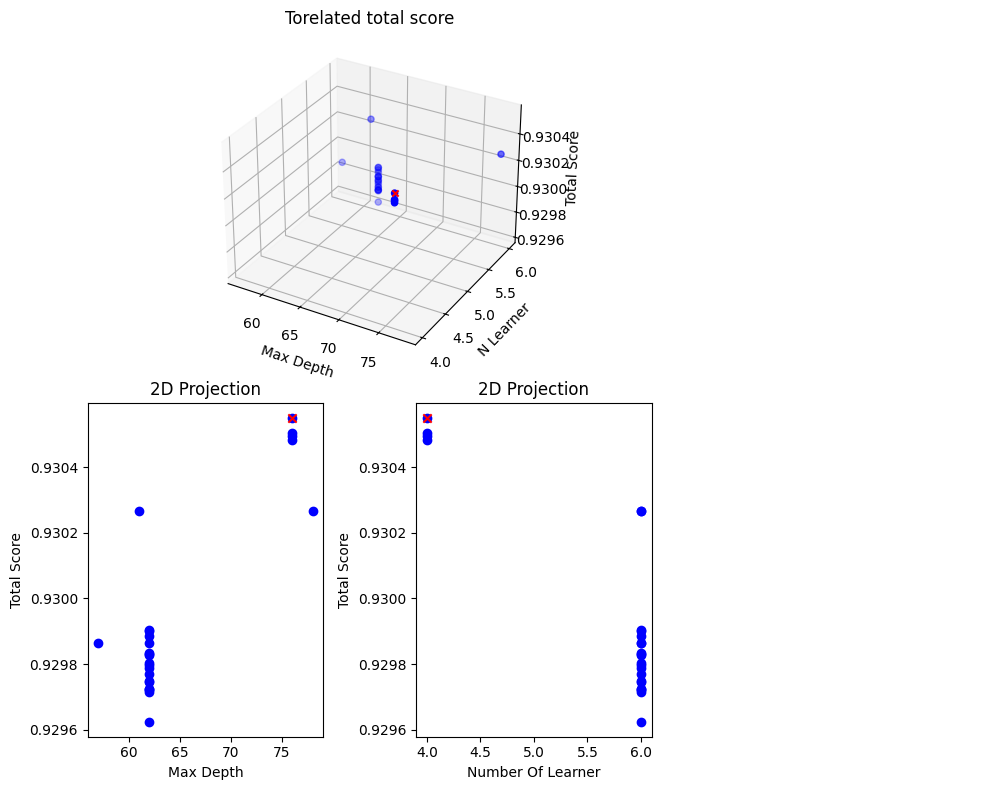

In [103]:

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 8))

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title('Torelated total score')

# Subplot 3
ax3 = plt.subplot2grid((2, 3), (1, 0))
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title('2D Projection')

# Subplot 4
ax4 = plt.subplot2grid((2, 3), (1, 1))
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title('2D Projection')

# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((2, 3), (0, 2))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## XGBoost

In [40]:
# Assuming the CSV file has the same name as the original text file
csv_file_path = 'xgresult.csv'

# Read the CSV file into a DataFrame
xgdf = pd.read_csv(csv_file_path)

xgdf.head()

,max_depth,n_learner,f1_score,elapsed_time,total_score
0,39,19,0.932270,162.344692,0.851097
1,63,23,0.935969,190.100941,0.840919
2,74,9,0.859764,65.083214,0.827222
3,82,14,0.917507,109.239075,0.862887
4,47,15,0.921803,116.681316,0.863463


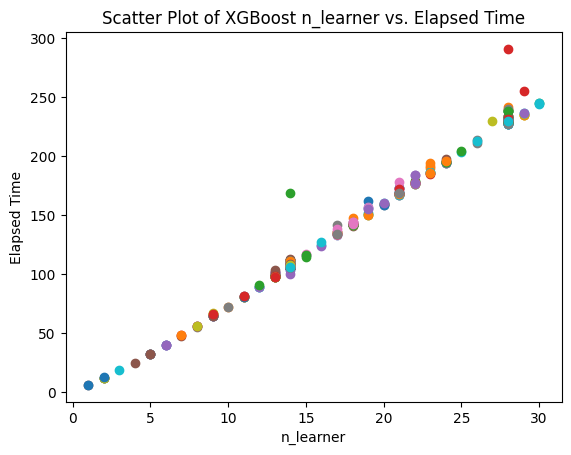

In [41]:
# Iterate through each row and create a scatter plot
for index, row in xgdf.iterrows():
    n_learner = row['n_learner']
    elapsed_time = row['elapsed_time']
    
    # Plot the point for each row
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}')

# Set labels and title
plt.xlabel('n_learner')
plt.ylabel('Elapsed Time')
plt.title('Scatter Plot of XGBoost n_learner vs. Elapsed Time')

# Display legend
# plt.legend()

# Show the plot
plt.show()


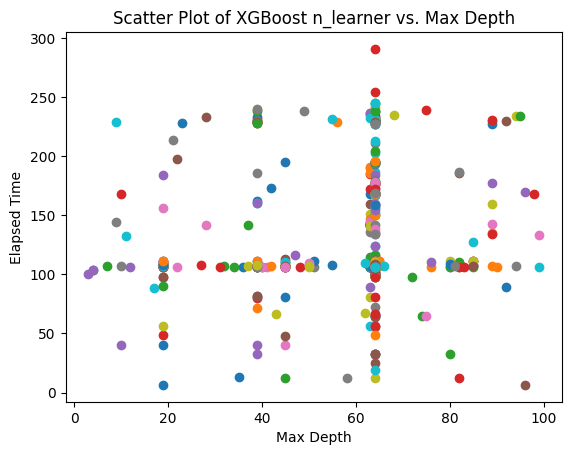

In [44]:
# Iterate through each row and create a scatter plot
for index, row in xgdf.iterrows():
    n_learner = row['max_depth']
    elapsed_time = row['elapsed_time']
    
    # Plot the point for each row
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}')

# Set labels and title
plt.xlabel('Max Depth')
plt.ylabel('Elapsed Time')
plt.title('Scatter Plot of XGBoost n_learner vs. Max Depth')

# Display legend
# plt.legend()

# Show the plot
plt.show()


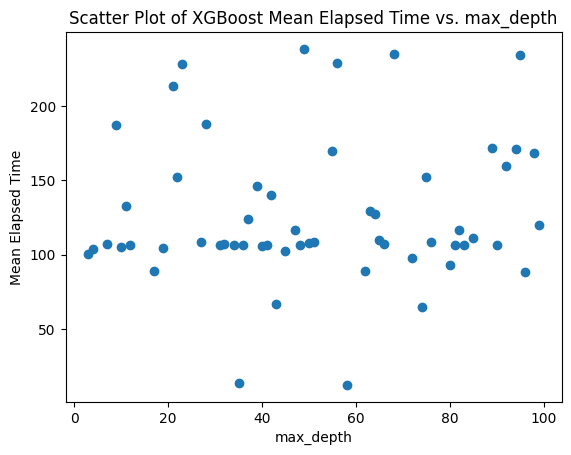

In [45]:
# Group by 'max_depth' and calculate the mean of 'elapsed_time'
mean_elapsed_time = xgdf.groupby('max_depth')['elapsed_time'].mean().reset_index()

# Scatter plot of mean_elapsed_time vs max_depth
plt.scatter(mean_elapsed_time['max_depth'], mean_elapsed_time['elapsed_time'])

# Set labels and title
plt.xlabel('max_depth')
plt.ylabel('Mean Elapsed Time')
plt.title('Scatter Plot of XGBoost Mean Elapsed Time vs. max_depth')

# Show the plot
plt.show()

In [85]:

# Find the row with the maximum 'total_score'
max_total_score_row = xgdf.loc[xgdf['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] -0.001

# Find rows with total_score within the tolerance range
rows_within_tolerance = xgdf[xgdf['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 64.0, 14.0, 0.8646199425056665
[45.0, 14.0, 0.9175065762594432, 107.214839220047, 0.8638991566494196], -0.08% Tolerance
[45.0, 14.0, 0.9175065762594432, 105.91449165344238, 0.8645493304327219], -0.01% Tolerance
[39.0, 14.0, 0.9175065762594432, 106.22766590118408, 0.8643927433088511], -0.03% Tolerance
[82.0, 14.0, 0.9175065762594432, 106.28964567184448, 0.8643617534235208], -0.03% Tolerance
[63.0, 14.0, 0.9175065762594432, 107.18318819999696, 0.8639149821594446], -0.08% Tolerance
[63.0, 14.0, 0.9175065762594432, 106.16031861305235, 0.8644264169529169], -0.02% Tolerance
[64.0, 14.0, 0.9175065762594432, 106.01470422744752, 0.8644992241457193], -0.01% Tolerance
[82.0, 14.0, 0.9175065762594432, 106.58477473258972, 0.8642141888931483], -0.05% Tolerance
[45.0, 14.0, 0.9175065762594432, 107.36325812339784, 0.8638249471977442], -0.09% Tolerance
[45.0, 14.0, 0.9175065762594432, 106.08404517173769, 0.8644645536735742], -0.02% Tolerance
[64.0, 14.0, 0.9175065762594432, 106.2251777

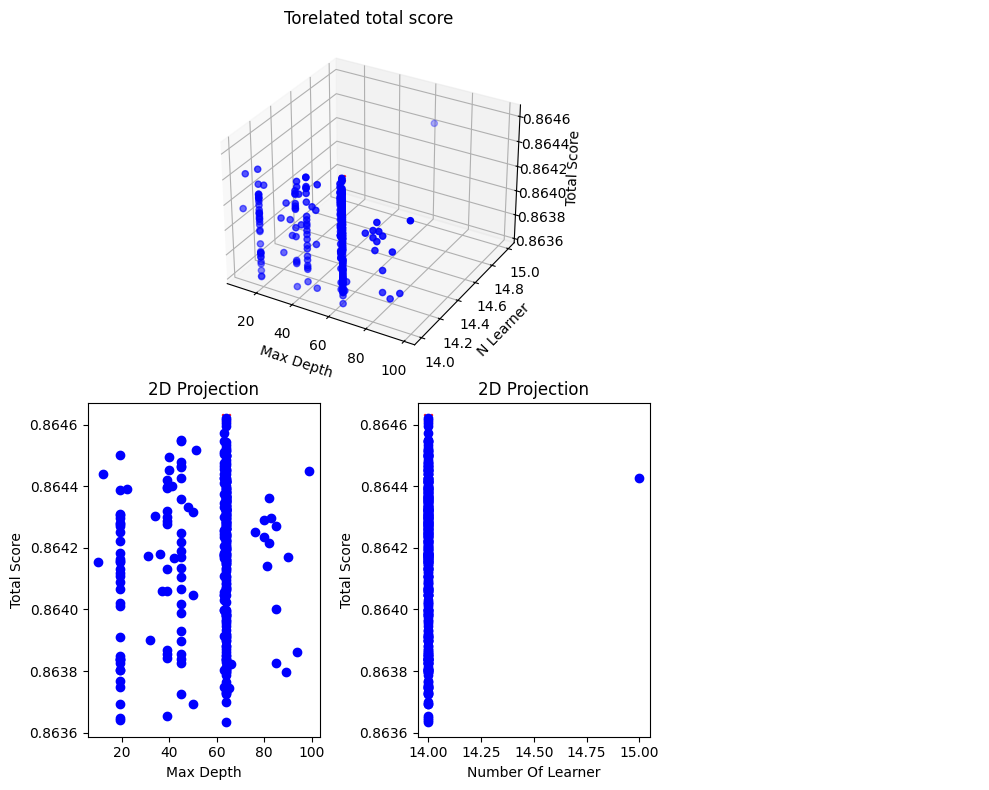

In [87]:

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 8))

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=2, projection='3d')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title('Torelated total score')

# Subplot 3
ax3 = plt.subplot2grid((2, 3), (1, 0))
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title('2D Projection')

# Subplot 4
ax4 = plt.subplot2grid((2, 3), (1, 1))
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title('2D Projection')

# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((2, 3), (0, 2))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()